# Action1_Dolphin_Embedding

数据集是 D.Lusseau 等人使用长达 7  年的时间观察新西兰 Doubtful Sound海峡 62 只海豚群体的交流情况而得到的海豚社会关系网络。这个网络具有 62 个节点，159  条边。节点表示海豚，边表示海豚间的频繁接触     数据文件：dolphins.gml     1）对Dolphin 关系进行Graph Embedding，使用GCN     2）对Embedding进行可视化（使用PCA呈现在二维平面上）

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
print(type(G))
#G = nx.read_gml('football.gml', relabel=True)
print(len(G))

<class 'networkx.classes.graph.Graph'>
62


In [3]:
# 初始化Node2Vec模型
#model = DeepWalk(G, walk_length=10, num_walks=5, workers=1)
model = Node2Vec(G, walk_length = 10, num_walks = 5, p = 0.25, q = 4, workers = 1)

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.03it/s]


In [4]:
# 模型训练
result = model.fit(window=4, iter=20)

In [11]:
# 得到节点的embedding
print(result.wv.most_similar('Zipfel')) # 相似度计算
embeddings = result.wv
embeddings.vocab

[('TSN83', 0.9995694756507874), ('SN4', 0.9974856972694397), ('Stripes', 0.997289776802063), ('Bumper', 0.9972541332244873), ('Scabs', 0.9968600273132324), ('Whitetip', 0.9968101978302002), ('Hook', 0.9968004822731018), ('Fork', 0.9966400861740112), ('SN9', 0.9964715242385864), ('SN63', 0.9964211583137512)]


{'Zipfel': <gensim.models.keyedvectors.Vocab at 0x13e83799910>,
 'SN4': <gensim.models.keyedvectors.Vocab at 0x13e83799970>,
 'Bumper': <gensim.models.keyedvectors.Vocab at 0x13e837999d0>,
 'SN96': <gensim.models.keyedvectors.Vocab at 0x13e83799a30>,
 'PL': <gensim.models.keyedvectors.Vocab at 0x13e83799a90>,
 'SN100': <gensim.models.keyedvectors.Vocab at 0x13e83799af0>,
 'Hook': <gensim.models.keyedvectors.Vocab at 0x13e83799b50>,
 'MN105': <gensim.models.keyedvectors.Vocab at 0x13e83799bb0>,
 'Topless': <gensim.models.keyedvectors.Vocab at 0x13e83799c10>,
 'Trigger': <gensim.models.keyedvectors.Vocab at 0x13e83799c40>,
 'Patchback': <gensim.models.keyedvectors.Vocab at 0x13e83799ca0>,
 'TR77': <gensim.models.keyedvectors.Vocab at 0x13e83799cd0>,
 'Oscar': <gensim.models.keyedvectors.Vocab at 0x13e83799d30>,
 'Kringel': <gensim.models.keyedvectors.Vocab at 0x13e83799100>,
 'Double': <gensim.models.keyedvectors.Vocab at 0x13e83799dc0>,
 'Beescratch': <gensim.models.keyedvectors.Vocab a

In [32]:
embeddings.vocab['Zig'].count

19

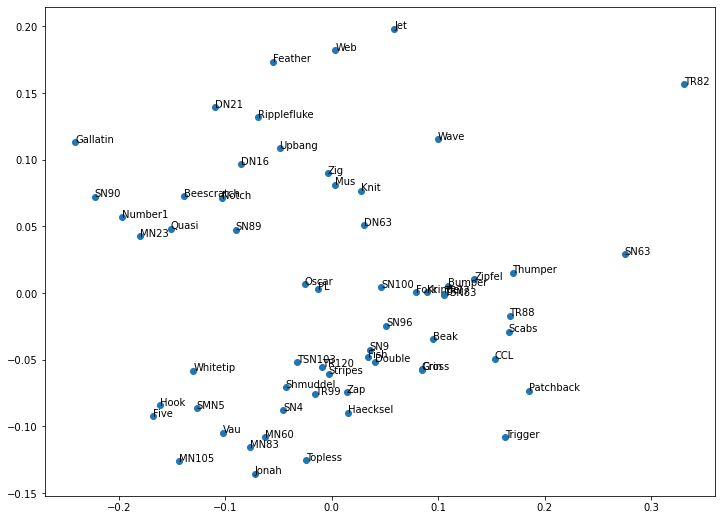

In [33]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(result.wv.vocab)

In [35]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

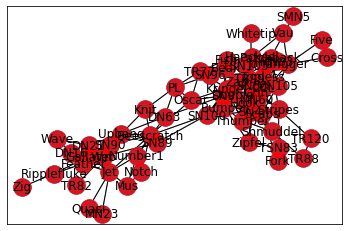

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
{}


In [61]:
# 可视化,
plot_graph(G)
print(G.nodes())
print(G.nodes['TR88']) # 无权图没有value

In [45]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [46]:
#邻接矩阵
A = to_numpy_matrix(G, nodelist=order)
print('A=\n', A) 

A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [47]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [48]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [50]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[-2.98237173e-01 -4.21179724e-01 -2.34190168e-01 -1.17576559e+00]
 [-1.24060559e+00  1.05334260e+00 -7.16359972e-01  1.05741132e+00]
 [ 4.57053791e-01  1.34339592e+00 -1.77504666e+00  1.75177321e-01]
 [-1.08928314e+00 -1.19138941e+00  1.44416587e+00 -1.64825273e+00]
 [ 1.40389258e-01  6.24475663e-01 -4.29966087e-01 -1.77607325e-01]
 [-5.39233605e-01 -8.77691463e-02  3.63347718e-01 -9.30926223e-01]
 [-5.14916502e-01  8.67918828e-01  7.45936286e-01  4.54602725e-02]
 [ 1.92015839e-01 -1.31209522e+00  6.30956093e-01 -2.12460738e+00]
 [-8.69608211e-01  1.04185313e+00 -1.56628964e+00  7.84639866e-01]
 [ 9.13708999e-01  5.72036639e-01  1.26870694e-01  3.60133797e-01]
 [ 2.99075820e-01  8.37988814e-01  1.12634734e+00 -8.13099086e-02]
 [-1.36072610e+00  7.15051200e-01 -1.45573228e-01  1.09489533e+00]
 [-6.22850568e-01 -6.12480263e-01  6.91985203e-01  3.66099458e-01]
 [ 1.05302376e-01  1.71799069e+00 -5.76592832e-01  1.09864206e+00]
 [-8.79703037e-01  3.51473667e-01 -1.65009370e-01 -7.386

In [70]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

output=
 [[0.021578   0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.03990249 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.14274314 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.13602434 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.10398715 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.42310584 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [1.36207264 0.        ]
 [0.         0.        ]
 [0.01341596 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0. 

In [52]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.021578, 0.      ]), 'Beescratch': array([0., 0.]), 'Bumper': array([0., 0.]), 'CCL': array([0., 0.]), 'Cross': array([0., 0.]), 'DN16': array([0., 0.]), 'DN21': array([0., 0.]), 'DN63': array([0., 0.]), 'Double': array([0., 0.]), 'Feather': array([0., 0.]), 'Fish': array([0., 0.]), 'Five': array([0., 0.]), 'Fork': array([0.03990249, 0.        ]), 'Gallatin': array([0., 0.]), 'Grin': array([0., 0.]), 'Haecksel': array([0., 0.]), 'Hook': array([0., 0.]), 'Jet': array([0., 0.]), 'Jonah': array([0.14274314, 0.        ]), 'Knit': array([0., 0.]), 'Kringel': array([0., 0.]), 'MN105': array([0.13602434, 0.        ]), 'MN23': array([0., 0.]), 'MN60': array([0., 0.]), 'MN83': array([0.10398715, 0.        ]), 'Mus': array([0., 0.]), 'Notch': array([0., 0.]), 'Number1': array([0., 0.]), 'Oscar': array([0., 0.]), 'Patchback': array([0., 0.]), 'PL': array([0.42310584, 0.        ]), 'Quasi': array([0., 0.]), 'Ripplefluke': array([0., 0.]), 'Scabs': array([

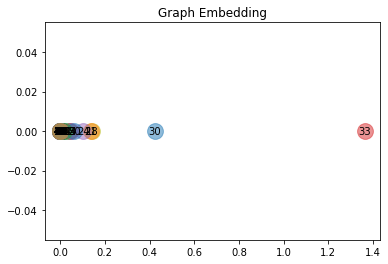

In [71]:
# 不同节点value，绘制不同的颜色
def getValue(value):
    colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
    return colorList[int(value)]
# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output, 'Graph Embedding')

output(去掉relu)=
: [[ 0.60319879  0.17214293]
 [-0.31802906  0.75941062]
 [-0.05755709 -0.87322288]
 [ 0.53358659  1.00956556]
 [-0.31767052 -1.17623751]
 [-1.14876573 -0.02856378]
 [-1.22427499  0.1042214 ]
 [ 0.75687296  0.34013465]
 [ 0.13986972  0.50087285]
 [-1.34216138  0.04701705]
 [ 0.27665103 -0.80911582]
 [-1.58398735 -0.48242287]
 [ 0.50147164  0.11595806]
 [-1.30833695  0.12497539]
 [ 0.66953962  0.44558304]
 [ 0.44080174  0.29281396]
 [ 0.35984476  0.33086265]
 [-0.52781305  0.28005562]
 [ 0.46165328 -0.42223517]
 [ 0.41067174  0.1827504 ]
 [ 0.28446848  0.24371566]
 [ 0.54468948 -0.53362772]
 [-1.24472195 -0.25061671]
 [ 0.1214519  -0.27600709]
 [ 0.51532105 -0.14178062]
 [ 0.26069063  1.01104523]
 [ 0.41957765  1.10929854]
 [ 0.39516096  0.78636648]
 [ 0.3645473   0.28855435]
 [ 0.50935837 -0.06174648]
 [ 1.37046086 -0.61750859]
 [ 0.50071361  0.42137668]
 [-1.34412105 -0.24073517]
 [ 3.56410171 -2.21595794]
 [ 0.74831109  0.5129884 ]
 [ 0.83791097 -0.01048785]
 [ 0.45429

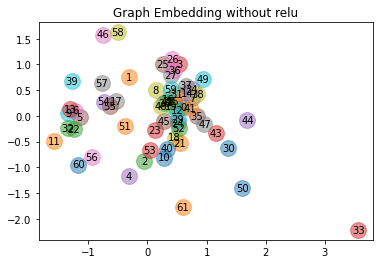

In [72]:
# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)


plot_node(output, 'Graph Embedding without relu')